<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-PotterSR/blob/main/Sep8-9/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [133]:
from pandas.core.api import DataFrame
#Data taken from https://www.kaggle.com/datasets/goyalshalini93/car-data
df=pd.read_csv("/content/drive/MyDrive/Data/CarPrice_Assignment.csv")

df.set_index('car_ID', inplace = True)

Company_name = df['CarName'].apply(lambda x: x.split(' ')[0])
df.insert(3, 'company_Name' ,Company_name)
df.drop(['CarName'], inplace = True, axis = 1)

df.company_Name.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [134]:
df.carbody.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [138]:
df.company_Name = df.company_Name.str.lower()

df.company_Name.replace('maxda', 'mazda', inplace = True)
df.company_Name.replace('porcshe', 'porsche' ,inplace = True)
df.company_Name.replace('toyouta', 'toyota', inplace = True)
df.company_Name.replace('vokswagen', 'volkswagen', inplace = True)
df.company_Name.replace('vw', 'volkswagen', inplace = True)
df.company_Name.replace('porcshce', 'porsche' ,inplace = True)

In [139]:
df.company_Name.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

<Axes: >

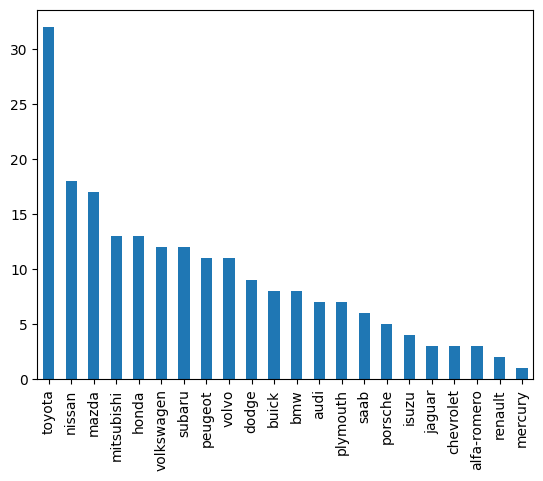

In [142]:
df.company_Name.value_counts().plot(kind = 'bar')

<BarContainer object of 205 artists>

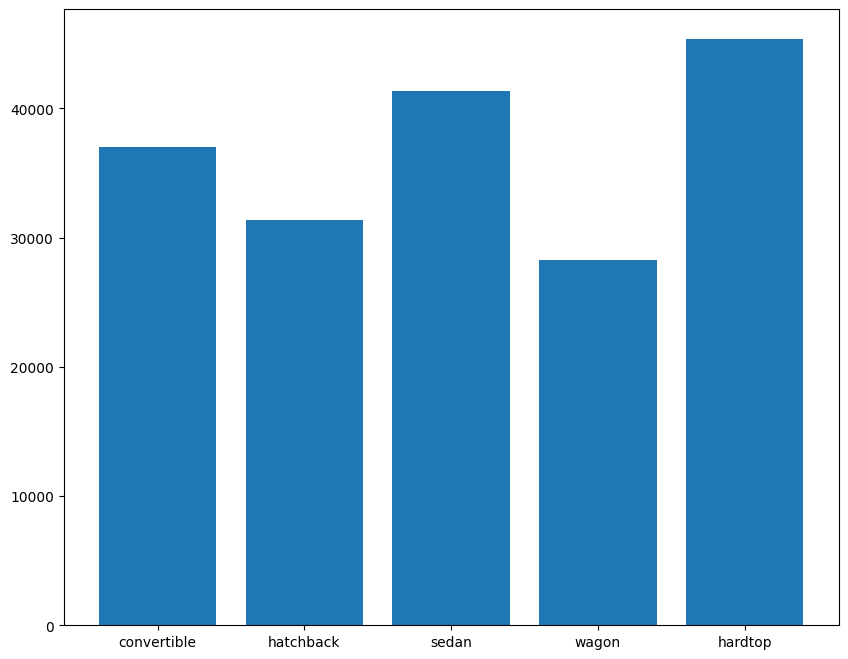

In [76]:
#Analiza la dependencia del valor del auto como función de cada variable categorica
fig = plt.figure(figsize = (10, 8))
plt.bar(df.carbody, df.price)


In [91]:
numerical.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


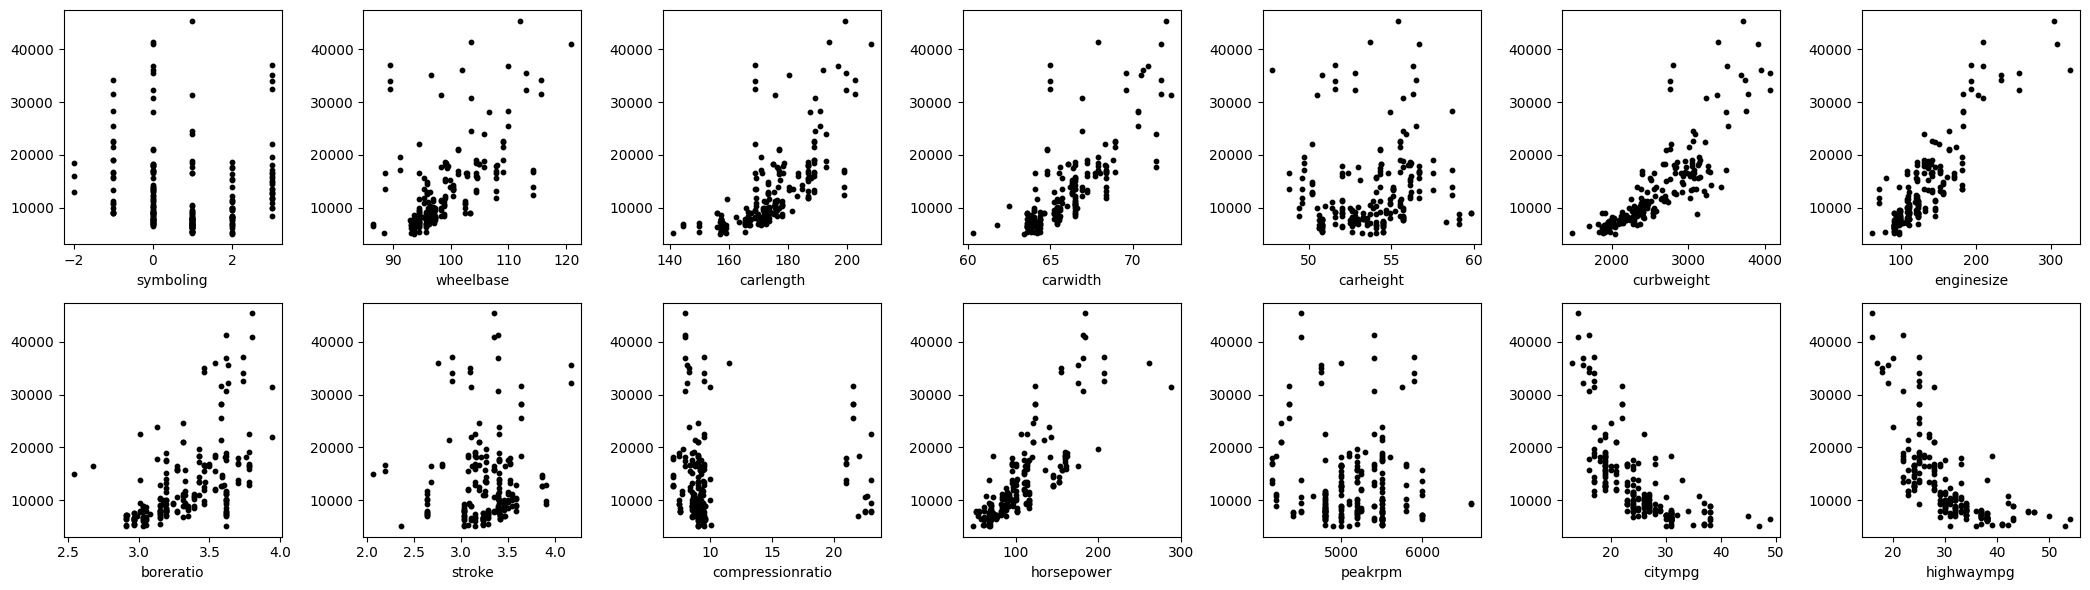

In [126]:
#Analiza la dependencia del valor del auto como función de cada variable numerica
label_num = numerical.columns
price = numerical.price

# Calculate the number of rows and columns for subplots
num_rows = 7
num_cols = 2

# Calculate the figure size to make the subplots square
fig_width = 6  # Adjust this value to control the size of each subplot
fig_height = num_rows / num_cols * fig_width

fig, ax = plt.subplots(num_cols, num_rows, figsize=(fig_height, fig_width))

k = 0

for i in range(num_cols):
    for j in range(num_rows):
        ax[i][j].scatter(numerical[label_num[k]], price, s=10, color='black')
        ax[i][j].set_xlabel(label_num[k])  # Set the aspect ratio to make plots square
        k += 1

plt.tight_layout()

# You can optionally adjust the spacing between subplots

#plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Modify hspace and wspace as needed
plt.show()


In [119]:
label_num

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [ ]:
#Define que variables numericas y categoricas usarás para crear tu modelo lineal.
use_vars=[]
categorical_vars=[]

In [ ]:
#Convierte las variables categoricas en variables "dummy" usando el siguiente código
df=df[use_vars]
df=pd.get_dummies(df,columns=categorical_vars,drop_first=True)


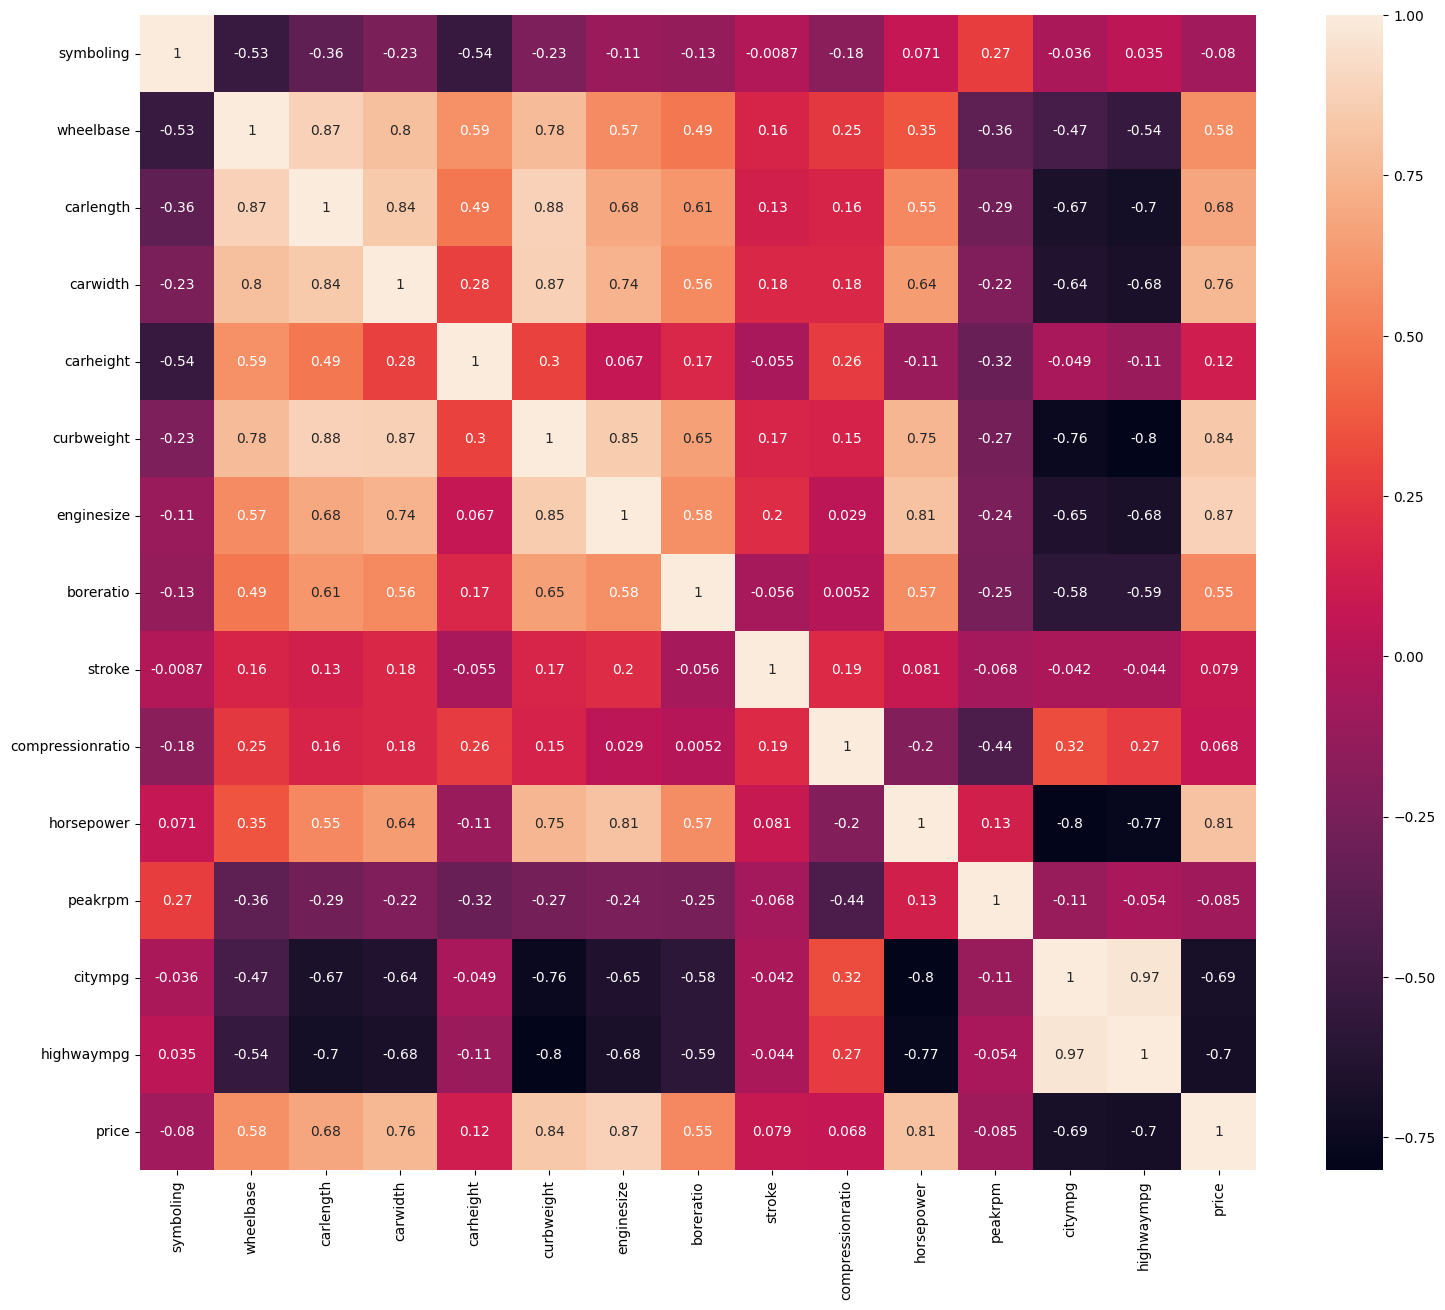

In [79]:
#Checa la correlación entre todas las variables usando un "heat map "
fig,ax=plt.subplots(1,1,figsize=(18,15))
sns.heatmap(df.corr(),annot=True);

In [ ]:
#Construye la matriz de caracteristicas X y el vector de target t.
#Normaliza las caracteristicas y procede a generar el modelo.
# Usa el 20% de los datos como conjunto de validación
# Utiliza Keras () para que puedas analizar la dependencia de la función costo como función del parametro de aprendizaje, para diferentes valores, y decidas cual usar.
# Posteriormente utiliza scikit-learn para comprobar tu resultado

In [ ]:
#Prueba con otros modelos, donde uses mas o menos caracteristicas. ¿cuál es el modelo que mejor desempeño tiene?